# 1. Importing Data into a Pandas DataFrame

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read rode data file and store it in a Pandas DF
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


# Data Cleaning: Inspect the City Data DF

In [5]:
# Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the Columns and rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the Data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data ponits from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data ponits from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data ponits from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
urban_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
urban_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

# Data Cleaning: Inspect the Ride Data DF

In [13]:
# Get the colums and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.loc[ride_data_df["city"]== "Lake Jonathanshire"].count()

city       24
date       24
fare       24
ride_id    24
dtype: int64

In [15]:
# Get the columns and the rows that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each colum.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

# 2: Merge DataFrames

In [17]:
# Combine the data into a single datset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

# Create DataFrames for Each Type of City

In [19]:
# Create the Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [21]:
# Create the Rural city DataFrames.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [22]:
# Create the Urban Cities DF, Suburban Cities DF, and Rural Cities DF
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()
suburban_cities_df.head()
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


# Get the Number of Rides for Each City Type

In [23]:
urban_cities_df.groupby(["city"]).count()

,date,fare,ride_id,driver_count,type
city,,,,,
Amandaburgh,18,18,18,18,18
Barajasview,22,22,22,22,22
Carriemouth,27,27,27,27,27
Christopherfurt,27,27,27,27,27
Deanville,19,19,19,19,19
...,...,...,...,...,...
West Patrickchester,16,16,16,16,16
West Robert,31,31,31,31,31
West Samuelburgh,25,25,25,25,25


In [24]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [25]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [26]:
# Create the suburban and rural ride count.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

# Get the Average Fare for Each City Type

In [27]:
urban_cities_df.groupby(["city"]).mean()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Deanville,25.842632,4.901508e+12,49.0
...,...,...,...
West Patrickchester,28.233125,5.302508e+12,25.0
West Robert,25.123871,4.575476e+12,39.0
West Samuelburgh,21.767600,4.566740e+12,73.0


In [28]:
# get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [29]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [30]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

# Get the Average Number of Drivers for each City Type

In [31]:
urban_cities_df.groupby(["city"]).mean()

,fare,ride_id,driver_count
city,,,
Amandaburgh,24.641667,5.359336e+12,12.0
Barajasview,25.332273,4.676968e+12,26.0
Carriemouth,28.314444,5.184855e+12,52.0
Christopherfurt,24.501852,4.582307e+12,41.0
Deanville,25.842632,4.901508e+12,49.0
...,...,...,...
West Patrickchester,28.233125,5.302508e+12,25.0
West Robert,25.123871,4.575476e+12,39.0
West Samuelburgh,21.767600,4.566740e+12,73.0


In [32]:
urban_cities_df["fare"].sum()

39854.380000000005

In [33]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [34]:
# Get the average number of drivers for each city for the suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [35]:
# Get the average number of drivers for each city for the rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

# Create Bubble Charts
NOTE:

.The x-axis is the number of rides for each city

.The y-axis is the average fare for each city

.The size of each marker is the average number of drivers in each city

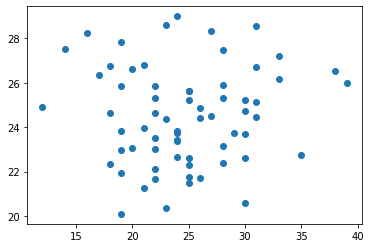

In [36]:
# Build the Scatter Plots for Urban Cities.
plt.scatter(urban_ride_count, urban_avg_fare)
plt.show()

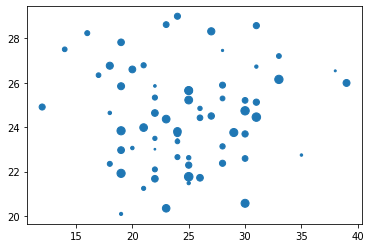

In [37]:
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)
plt.show()

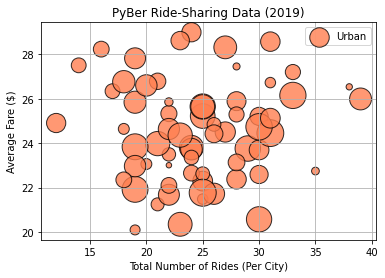

In [38]:
# Build the Scatter plots for Urban Cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

# Create the Suburban Cities Bubble Chart

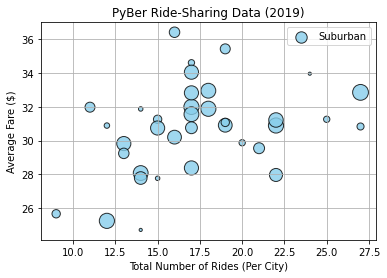

In [39]:
# Build the scatter plots for the suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor="black",
           linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the Ledend
plt.legend()

# Show the Plot
plt.show()

# 3. Calculate Summary Statistics
## Create the Rural Cities Bubble Chart

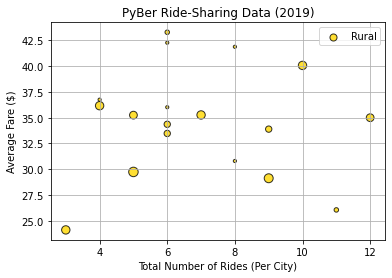

In [40]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
# Show the Plot
plt.show()

# Create a Bubble Chart for all Cities

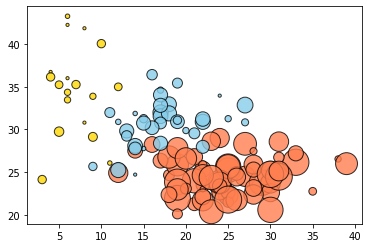

In [41]:
# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

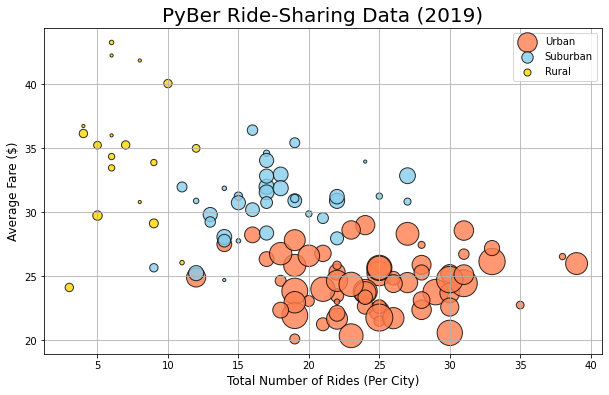

In [42]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

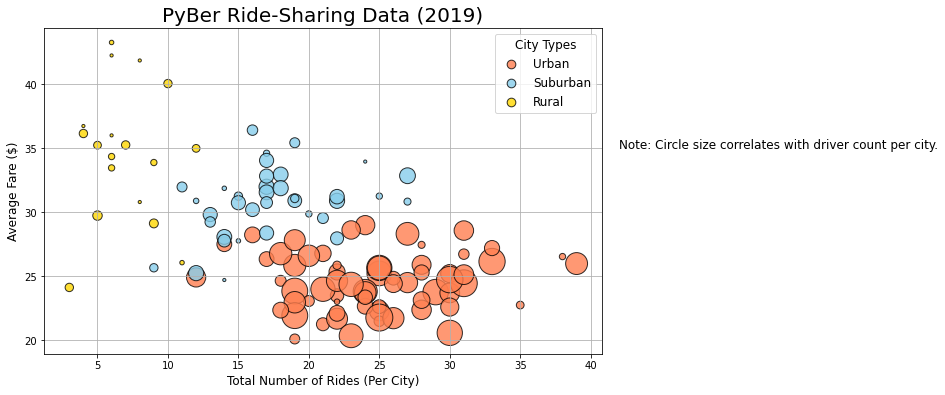

In [43]:
# Add the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Add the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

# 4. Summary Statistics for Number of Rides by City Type

## Use Panda Describe() Function

In [44]:
# Get Summery Statistics for Urban Cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [45]:
# Get Summary Statistics for Suburban Cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [46]:
# Get Summary Statistics for Rural Cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [47]:
# Get Summary Statistics for Suburban and Rural Cities
suburban_cities_df.describe(), rural_cities_df.describe()

(             fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 std     14.558046  2.887834e+12      2.691156
 min     10.110000  2.684873e+10      1.000000
 25%     19.900000  2.275364e+12      1.000000
 50%     37.050000  4.023962e+12      4.000000
 75%     47.070000  7.118047e+12      7.000000
 max     58.550000  9.990581e+12      9.000000)

In [48]:
# Get Summery Statistics of the Ride Count for Urban Cities
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [49]:
# Get Summery Statistics of the Ride Count for Sunurban Cities
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [50]:
# Get Summary Statistics of the Ride Count for Rural Cities
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

# Pandas mean(), median(), and mode() Methods

In [51]:
# Calculate the mean of the Ride Count for each City Type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [52]:
# Calculate the median of the Ride Count for each City Type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [53]:
# Calculate the mode of the Ride Count for each City Type.
round(urban_ride_count.mode(), 2), round(suburban_ride_count.mode(), 2), round(rural_ride_count.mode(), 2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

# NumPy mean() and median() Functions and SciPy mode() Function

In [54]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [55]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [56]:
# Calculate the measures of central tendency for the ride count for the Suburban Cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride count for the suburban trips is{mean_suburban_ride_count: .2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride count for the suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride count for the suburban trips is {mode_suburban_ride_count}.")

The mean for the ride count for the suburban trips is 17.36.
The median for the ride count for the suburban trips is 17.0.
The mode for the ride count for the suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [57]:
# Calculate the measures of central tendency for the ride count for the Rural Cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride count for the rural trips is{mean_rural_ride_count: .2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride count for the rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride count for the rural trips is {mode_rural_ride_count}.")

The mean for the ride count for the rural trips is 6.94.
The median for the ride count for the rural trips is 6.0.
The mode for the ride count for the rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


# Summary Statistics for the Fare by City Type

In [58]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [59]:
round(urban_fares.mean(),2), urban_fares.median(), urban_fares.mode()

(24.53,
 24.64,
 0    22.86
 Name: fare, dtype: float64)

In [60]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [61]:
 # Demonstrate calculating measures of central tendency for the AVG  fare for the urban cites
mean_urban_avg_fare = np.mean(urban_avg_fare)
print(f"The mean fare price for urban trips is {mean_urban_avg_fare:.2f}.")

median_urban_avg_fare = np.median(urban_avg_fare)
print(f"The median fare price for urban trips is {median_urban_avg_fare:.2f}.")

mode_urban_avg_fare = sts.mode(urban_avg_fare)
print(f"The mode fare price for urban trips is {mode_urban_avg_fare}.")

The mean fare price for urban trips is 24.50.
The median fare price for urban trips is 24.48.
The mode fare price for urban trips is ModeResult(mode=array([20.09315789]), count=array([1])).


In [62]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [63]:
round(suburban_fares.mean(),2), suburban_fares.median(), suburban_fares.mode()

(30.97,
 30.75,
 0    17.99
 1    23.06
 2    35.76
 3    41.85
 Name: fare, dtype: float64)

In [64]:
# Demonstrate calculating measures of central tendency for the fare for the urban cites
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is {mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_avg_fare)
print(f"The median fare price for suburban trips is {median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_avg_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is 30.97.
The median fare price for suburban trips is 30.90.
The mode fare price for suburban trips is ModeResult(mode=array([24.70428571]), count=array([1])).


In [65]:
 # Demonstrate calculating measures of central tendency for the AVG  fare for the suburban cites
mean_suburban_avg_fare = np.mean(suburban_avg_fare)
print(f"The mean fare price for suburban trips is {mean_suburban_avg_fare:.2f}.")

median_suburban_avg_fare = np.median(suburban_avg_fare)
print(f"The median fare price for suburban trips is {median_suburban_avg_fare:.2f}.")

mode_suburban_avg_fare = sts.mode(suburban_avg_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_avg_fare}.")

The mean fare price for suburban trips is 30.74.
The median fare price for suburban trips is 30.90.
The mode fare price for suburban trips is ModeResult(mode=array([24.70428571]), count=array([1])).


In [66]:
# Get the fare for the Rural Cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [67]:
round(rural_fares.mean(),2), rural_fares.median(), rural_fares.mode()

(34.62,
 37.05,
 0    37.05
 1    51.80
 2    54.66
 Name: fare, dtype: float64)

In [68]:
# Calculate the measures of central Tendency for the Average Fare fpr the Rural Cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares: .2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares: .2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $ 34.62.
The median fare price for rural trips is $ 37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [69]:
 # Demonstrate calculating measures of central tendency for the AVG  fare for the urban cites
mean_rural_avg_fare = np.mean(rural_avg_fare)
print(f"The mean fare price for rural trips is {mean_rural_avg_fare:.2f}.")

median_rural_avg_fare = np.median(rural_avg_fare)
print(f"The median fare price for rural trips is {median_rural_avg_fare:.2f}.")

mode_rural_avg_fare = sts.mode(rural_avg_fare)
print(f"The mode fare price for rural trips is {mode_rural_avg_fare}.")

The mean fare price for rural trips is 34.64.
The median fare price for rural trips is 35.12.
The mode fare price for rural trips is ModeResult(mode=array([24.12333333]), count=array([1])).


# Summary Statistics for the Number of Drivers by City Type

In [70]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [71]:
# Calculate the measures of central tendency for the driver counts for Urban Cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers: .0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers: .0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is  37.
The median number of drivers in urban cities is  37.
The mode drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [72]:
# Get the Driver Count Data from the Suburban Cities.
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [73]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean for the number of drivers for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median for the number of drivers for suburban trips is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode for the number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean for the number of drivers for suburban trips is 13.71.
The median for the number of drivers for suburban trips is 16.00.
The mode for the number of drivers for suburban trips is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [74]:
# Get the Driver Count Data from the Rural Cities.
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [75]:
# Calculate the measures of central tendency for the number of drivers for the Rural Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean for the number of drivers for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median for the number of drivers for rural trips is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode for the number of drivers for rural trips is {mode_rural_drivers}.")

The mean for the number of drivers for rural trips is 4.30.
The median for the number of drivers for rural trips is 4.00.
The mode for the number of drivers for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32])).


#  Create Box and Whisker Plots

# Box-and-Whisker Plots for Ride Count Data

In [76]:
# Get the driver counts for Urban Cities
urban_drivers = urban_cities_df["driver_count"]
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

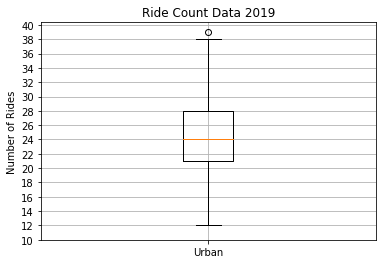

In [77]:
# Create a box-and-whisker Plot for the Urban Cities Ride Count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y_axis Label and Grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

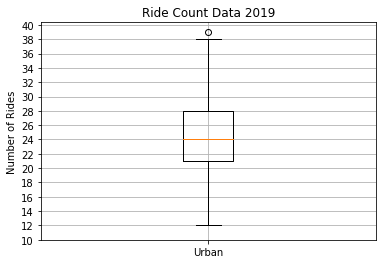

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [78]:
# Create a box-and-whisker Plot for the Urban Cities Ride Count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y_axis Label and Grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

# Add the Summary Statistics.
urban_ride_count.describe()

In [79]:
# Get the driver counts for Suburban Cities
suburban_drivers = suburban_cities_df["driver_count"]
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [80]:
# Calculate the measures of central tendency for the driver counts for Suburban Cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburban_drivers: .0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers: .0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode drivers in suburban cities is {mode_suburban_drivers}.")

The mean number of drivers in suburban cities is  14.
The median number of drivers in suburban cities is  16.
The mode drivers in suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


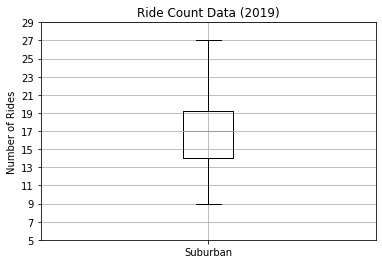

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [81]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 31, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
suburban_ride_count.describe()

In [82]:
# Get the driver counts for Rural Cities
rural_drivers = rural_cities_df["driver_count"]
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [83]:
# Calculate the measures of central tendency for the driver counts for Rural Cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in suburban cities is {mean_rural_drivers: .0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in suburban cities is {median_rural_drivers: .0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode drivers in suburban cities is {mode_rural_drivers}.")

The mean number of drivers in suburban cities is  4.
The median number of drivers in suburban cities is  4.
The mode drivers in suburban cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


In [84]:
urban_ride_count.median

<bound method NDFrame._add_numeric_operations.<locals>.median of city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64>

In [85]:
suburban_ride_count.median

<bound method NDFrame._add_numeric_operations.<locals>.median of city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64>

In [86]:
rural_ride_count.median

<bound method NDFrame._add_numeric_operations.<locals>.median of city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64>

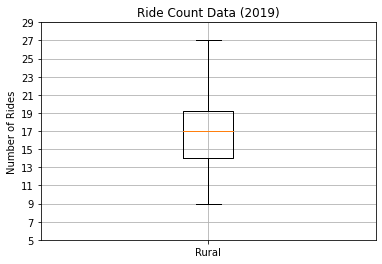

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [87]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()
# Add the summary statistics.
rural_ride_count.describe()

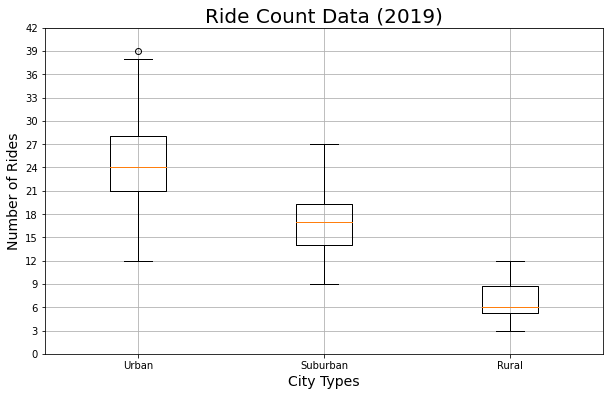

In [88]:
# Add all ride count box plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig2.png")
plt.show()

## Determine the Urban City that has the Highest Rider Count.

In [89]:
# Get the 100% quantitle, which is the Upper Outlier
urban_ride_count==39

city
Amandaburgh            False
Barajasview            False
Carriemouth            False
Christopherfurt        False
Deanville              False
                       ...  
West Patrickchester    False
West Robert            False
West Samuelburgh       False
Williamsstad           False
Williamsview           False
Name: ride_id, Length: 66, dtype: bool

In [90]:
# Get the city that matches 39. 
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


# Box - and -Wisker Plots for Ride Fare Data

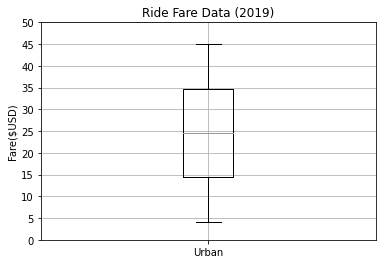

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [91]:
# Create a box_and whisker plot for the Urban Fare Data.
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

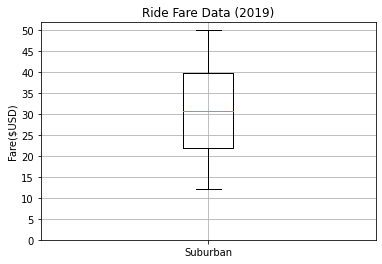

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [92]:
# Create a box_and whisker plot for the Suburban Fare Data.
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

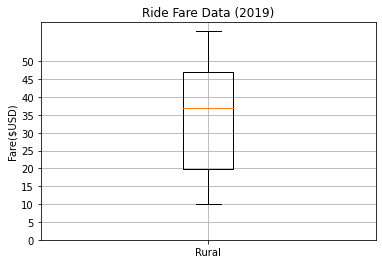

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [93]:
# Create a box_and whisker plot for the Rural Fare Data.
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

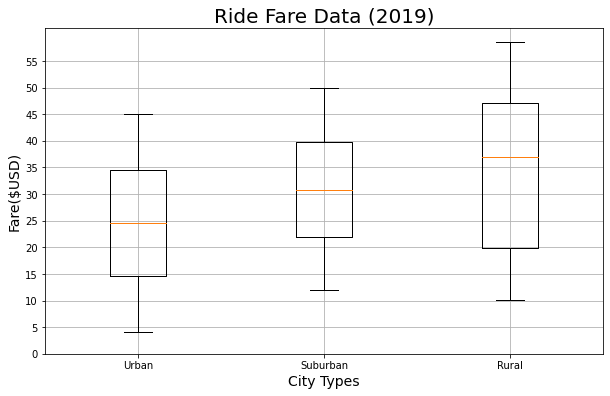

In [94]:
# Add all fare data box-and-whisker plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare($USD)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 56, step=5.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig3.png")
plt.show()

# Box - and - Wisker Plots for Driver Count Data

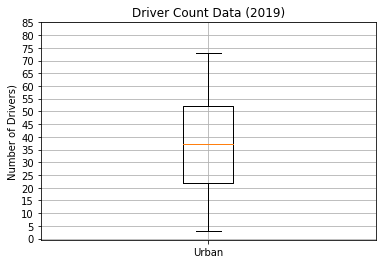

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [95]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

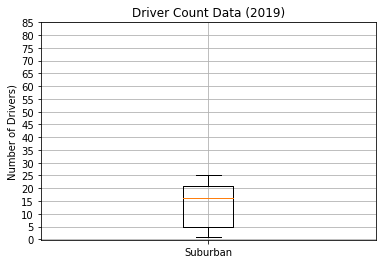

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [96]:
# Create the box-and-whisker plot for the Suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

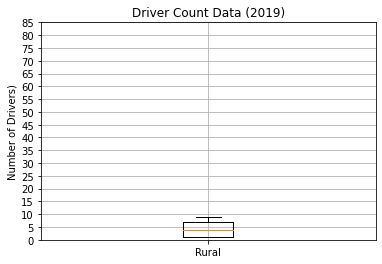

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [97]:
# Create the box-and-whisker plot for the Rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

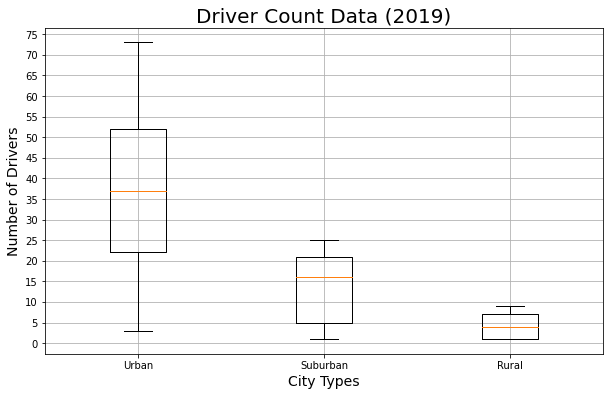

In [98]:
# Add all fare data box-and-whisker plots to the same graph. 
x_labels = ["Urban", "Suburban","Rural"]
fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
# Save Figure
plt.savefig("analysis/Fig4.png")
plt.show()

# Percentage of Total Fares by City Type

. The percent of total fares.

. The percent of total rides.

. The percent of total drivers. 

# Get the percentages of Fares for each City Type
1. Get the total fares for each city type.
2. Get the total for all the fares for all the city types.
3. Calculate the percentage of the total fares for each city type.

In [99]:
# Get the Sum of the Fares for Each City Type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [100]:
# Get the Sum of all the Fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [101]:
# Calculate the Percentage of Fare for each City Type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [102]:
# Calculate the Percentage of Fare for All City Type in One Line.
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

# Pie Chart for the Percentage of Fares by City Type.

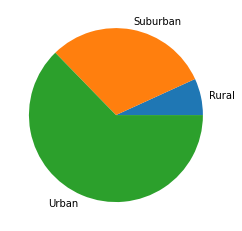

In [103]:
# Build Pie Chart by using MATLAB approach, using the plt,pie() Function
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

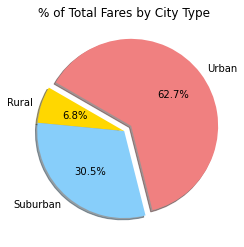

In [104]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

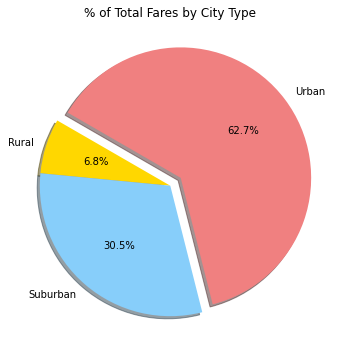

In [105]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

# Calculate Ride Percentages

# Get the percentages of Total Rides for each City Type
1.Get the total number of rides for each city type

2.Get the total rides for all the city types

3.Calculate the percentage of the total rides for each city type

In [106]:
# Calculate the Percentage of Rides for each City Type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

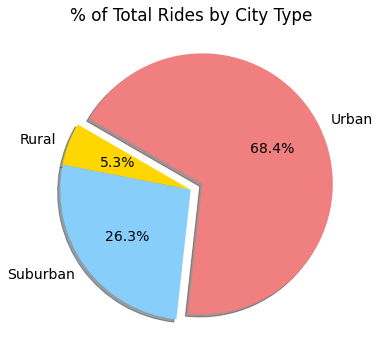

In [110]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()